# Basics of quibits, gates, and circuits.

A qubit is the fundamental unit of quantum information. In quantum computing, logical operations are designed to act on qubits, treating them as idealized, perfectly isolated quantum systems—often referred to as pure or closed states. However, in real-world quantum hardware, qubits are susceptible to imperfections caused by environmental noise and other disturbances. To address these challenges, quantum error correction and mitigation techniques are employed separately. This distinction ensures that the core principles of quantum computing remain universal and independent of specific hardware constraints.

## Representing a logical qubit
The state of an ideal qubit can be represented as a 2-dimensional unit vector and visualized as a point on the *Bloch **sphere** (see the red dot below). Any point on this sphere represents a linear combination of the 0 and 1 states with complex coefficients. A π/2-pulse 'rotates' a qubit from the 0-state to a superposition state. 

![The Bloch Sphere][blochSphereImage]

[blochSphereImage]: ./images/The-Bloch-sphere.png

A qubit’s state is mathematically represented as a superposition, meaning it exists in a linear combination of its two basis states, |0⟩ and |1⟩, until it is measured. This state is expressed as:


\[
|\psi\rangle = a|0\rangle + b|1\rangle
\]


where  a  and  b  are complex probability amplitudes that determine the likelihood of the qubit collapsing into either basis state upon measurement. The squared magnitudes of these amplitudes, 
$a^{2}$ and $b^{2}$, represent the probabilities of measuring the qubit in state |0⟩ or |1⟩, respectively, ensuring that $a^{2}$ + $b^{2}$ = 1.

Measurement forces the qubit to ‘collapse’ into one of these definite states, losing its superposition. This fundamental property of quantum mechanics underlies quantum computation and differentiates qubits from classical bits, which can only exist in one state at a time.”

## Quantum logic gates
Quantum logic gates are fundamental operations that manipulate qubits by transforming their quantum states. Unlike classical logic gates, which operate on binary bits (0 and 1), quantum gates modify a qubit’s state by applying unitary transformations, effectively rotating them to different positions on the Bloch sphere—a geometric representation of qubit states.

Single-qubit gates play a crucial role in quantum computation. Some key examples include:
- **Pauli Gates (X, Y, Z)**: These represent 180-degree rotations around the X, Y, and Z axes of the Bloch sphere.
  - The X gate (quantum NOT gate) flips |0⟩ to |1⟩ and vice versa.
  - The Y gate introduces a phase shift while flipping the state.
  - The Z gate applies a phase shift to |1⟩ while leaving |0⟩ unchanged.
 
- **Hadamard Gate (H)**: This gate creates superposition by transforming the computational basis states |0⟩ and |1⟩ into equal superpositions of both:

$H|0⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩), \quad H|1⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩).$

This allows quantum algorithms to leverage parallelism, a key advantage over classical computing.

Beyond single-qubit operations, quantum circuits also utilize multi-qubit gates like the CNOT (Controlled-NOT) gate, which entangles qubits—a fundamental feature enabling quantum advantage. The collective application of these gates forms the basis of quantum algorithms, driving advancements in quantum computing.

## Quantum circuits
n quantum computing, algorithms are implemented by combining quantum logic gates into structured quantum circuits. These circuits follow a fundamental three-stage process: encoding input data, executing computations, and extracting results through measurement.

The first step, encoding the input, involves preparing the initial quantum state by applying specific gates that map classical information onto qubits. This stage is crucial because different problems require different ways of encoding data, ensuring that the quantum system begins in a state suited for computation. Once the input is set, the circuit proceeds to the execution phase, where a sequence of quantum gates manipulates the qubits according to the algorithm’s logic. Unlike classical computation, this process leverages the principles of superposition, entanglement, and quantum interference, allowing quantum circuits to explore multiple computational paths simultaneously.

Finally, the measurement stage collapses the quantum state, converting the qubits into classical bits that can be read as output. Because quantum measurement is inherently probabilistic, multiple runs of the same circuit may be needed to obtain reliable results. While the gates responsible for encoding the input must change whenever a different dataset is used, the core computational operations remain the same for a given algorithm. This separation of input preparation from execution enhances the modularity and adaptability of quantum circuits, making them powerful tools for solving a wide range of computational problems.

## Simulate simple gates in Qiskit
Let’s first create and draw a circuit with one qubit and one classical bit.

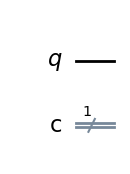

In [5]:
# Load qiskit functions into the local namespace
from qiskit import *       

# Creat a circuit qc with 1 qubit and 1 classical bit
qc = QuantumCircuit(1,1)   

# Draw the circuit ('mpl'asks to render using Matplotlib) 
qc.draw(output = 'mpl')   

Let’s check the state of the qubit before applying any gates, in both vector and Bloch sphere representations.

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


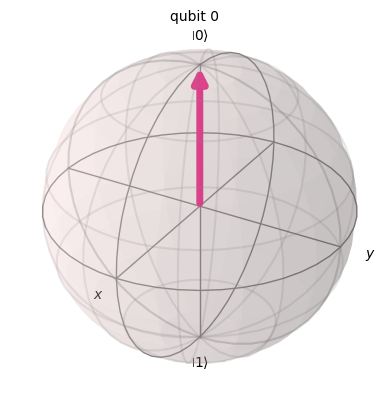

In [6]:
# subpackages need to be separately imported
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector

init_state = Statevector(qc);   
print(init_state)  

plot_bloch_multivector(init_state)

Let’s now add a gate to our circuit:

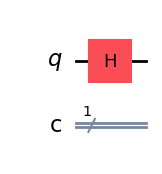

In [7]:
qc.h(0);                        # Apply a Hadamard to the q0 of qc
qc.draw(output = 'mpl')

Let’s check the qubit state again (in both vector and Bloch sphere representations):

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


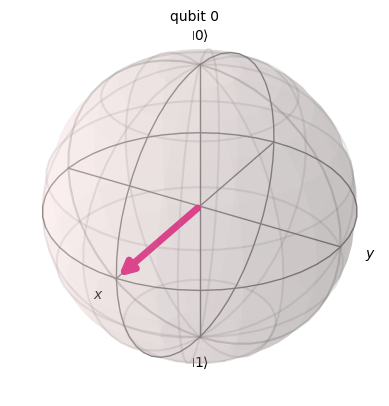

In [8]:
h_state = Statevector(qc); 
print(h_state)  

plot_bloch_multivector(h_state)

Let's now do a measurement:

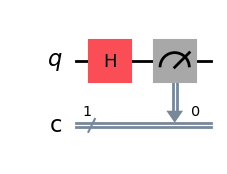

In [9]:
qc.measure(0, 0); # Measure qubit 0 to the classical bit 0
qc.draw(output='mpl')

Let’s now run the circuit on a quantum simulator and look at the statistical results of repeated circuit preparation & measurement:

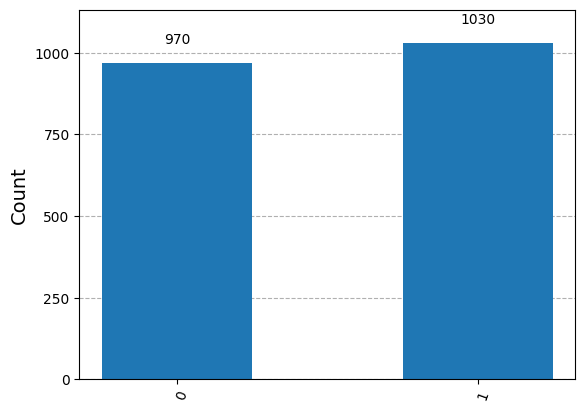

In [12]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc, shots=2000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)

Notice that the statistical output is ~50% for both 0 and 1, as the state vector resulting from the Hadamard had probability amplitudes a = b ≈ 0.707 (and therefore probabilities of measurement |a|² = |b|² = 0.5).